In [1]:
figDir = '~/Hyphosphere/data/3Exp/figures/final'

#work_dir = '~/Hyphosphere/data/3Exp/Composition'

# phyloseq - full object with tree (does not include archaea)
physeq_file = '~/Hyphosphere/data/3Exp/phyloseq/final/3Exp_phyloseq_thresh_wtree_experimental_woContam.rds'

In [2]:
library(RColorBrewer)
library(vegan)
library(ggpubr)
library(tidyr)
library(dplyr)
library(reshape2)
library(phyloseq)
library(gridExtra)
library(ggplot2)
library(foreach)
library(doParallel)


Warning message:
“package ‘RColorBrewer’ was built under R version 3.6.1”Warning message:
“package ‘vegan’ was built under R version 3.6.1”Loading required package: permute
Warning message:
“package ‘permute’ was built under R version 3.6.1”Loading required package: lattice
Warning message:
“package ‘lattice’ was built under R version 3.6.1”This is vegan 2.5-5
Loading required package: ggplot2
Warning message:
“package ‘ggplot2’ was built under R version 3.6.1”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘reshape2’ was built under R version 3.6.1”
Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Warning message:
“package ‘phyloseq’ was built under R version 3.6.1”
Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

W

In [3]:
theme_pub = function (base_size = 8, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            axis.text = element_text(size = base_size),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE,
            legend.text = element_text(size = base_size),
            legend.title = element_text(face = "bold"))
    
    }

In [4]:
ps = readRDS(physeq_file)
ps = subset_taxa(ps, !is.na("Phylum"))


tax_table(ps) %>% head()
ps = subset_taxa(ps, Kingdom == "Bacteria" &  !is.na(Phylum))
ps = subset_samples(ps, !SampleType %in% c("EB", "PB", "MK")) #remove non-experimental controls

# re-normalize after subsetting taxa
ps.snorm = transform_sample_counts(ps, function(x) x/sum(x))

otu_table(ps.snorm)[1:4, 1:10]
tax_table(ps.snorm) %>% tail()

ps.snorm
                                  


,Kingdom,Phylum,Class,Order,Family,Genus
ASV6971,Bacteria,NA,NA,NA,NA,NA
ASV2480,Bacteria,NA,NA,NA,NA,NA
ASV5742,Bacteria,NA,NA,NA,NA,NA
ASV15180,Bacteria,Acidobacteria,Subgroup_20,NA,NA,NA
ASV9985,Bacteria,Acidobacteria,Subgroup_20,NA,NA,NA
ASV22021,Bacteria,Acidobacteria,Subgroup_20,NA,NA,NA


,ASV15180,ASV9985,ASV22021,ASV9417,ASV20094,ASV25884,ASV14673,ASV10366,ASV30259,ASV659
1.1BP,0,0,0.0001412274,0,0,0,0,0,0,0.0006119855
1.1BS,0,0,0.0000000000,0,0,0,0,0,0,0.0011081508
1.1CH,0,0,0.0000000000,0,0,0,0,0,0,0.0002464673
1.1CS,0,0,0.0000000000,0,0,0,0,0,0,0.0006685769


,Kingdom,Phylum,Class,Order,Family,Genus
ASV2498,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfarculales,Desulfarculaceae,NA
ASV11419,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfarculales,Desulfarculaceae,NA
ASV5649,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfarculales,Desulfarculaceae,NA
ASV22326,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfarculales,Desulfarculaceae,NA
ASV7976,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfarculales,Desulfarculaceae,NA
ASV10788,Bacteria,Proteobacteria,Deltaproteobacteria,Desulfarculales,Desulfarculaceae,NA


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 18707 taxa and 385 samples ]
sample_data() Sample Data:       [ 385 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 18707 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 18707 tips and 18706 internal nodes ]

# Experiment 1 primary analysis

In [182]:
ps.s = ps.snorm %>% subset_samples(Experiment %in% c(1) & SampleType %in% c("CS", "CH", "BS") & Fungus == "Gv")

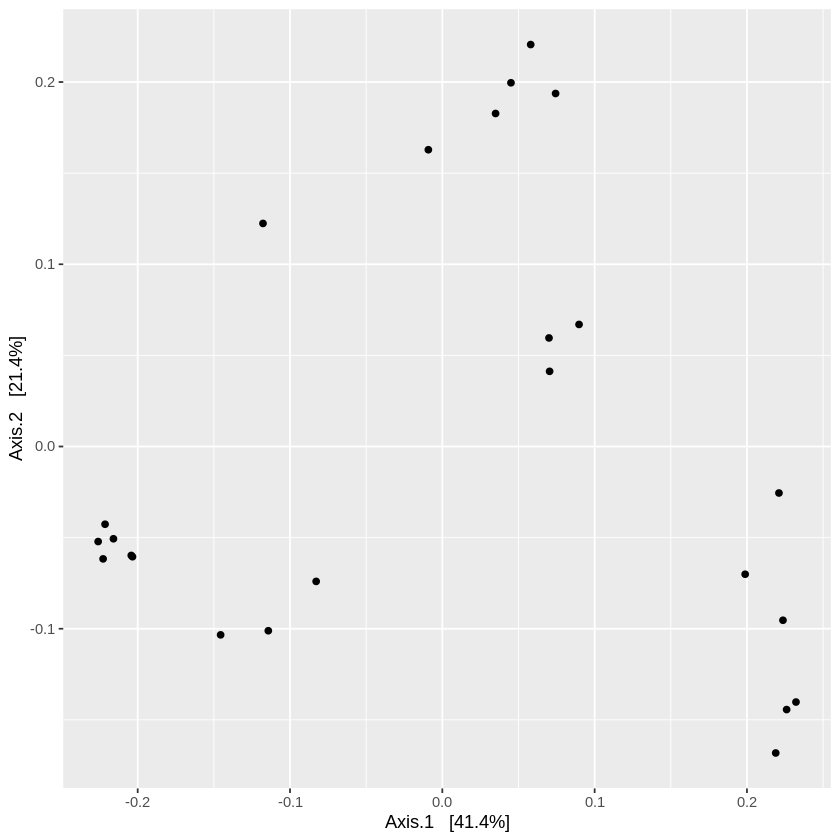

In [183]:
ordu = ordinate(ps.s, "PCoA", "unifrac", weighted=TRUE)
p = plot_ordination(ps.s, ordu, justDF = TRUE)
plot_ordination(ps.s, ordu)

In [186]:
cs = brewer.pal(3,"Dark2")[2:3]
cs

[1] "#D95F02" "#7570B3"

png 
  2

png 
  2

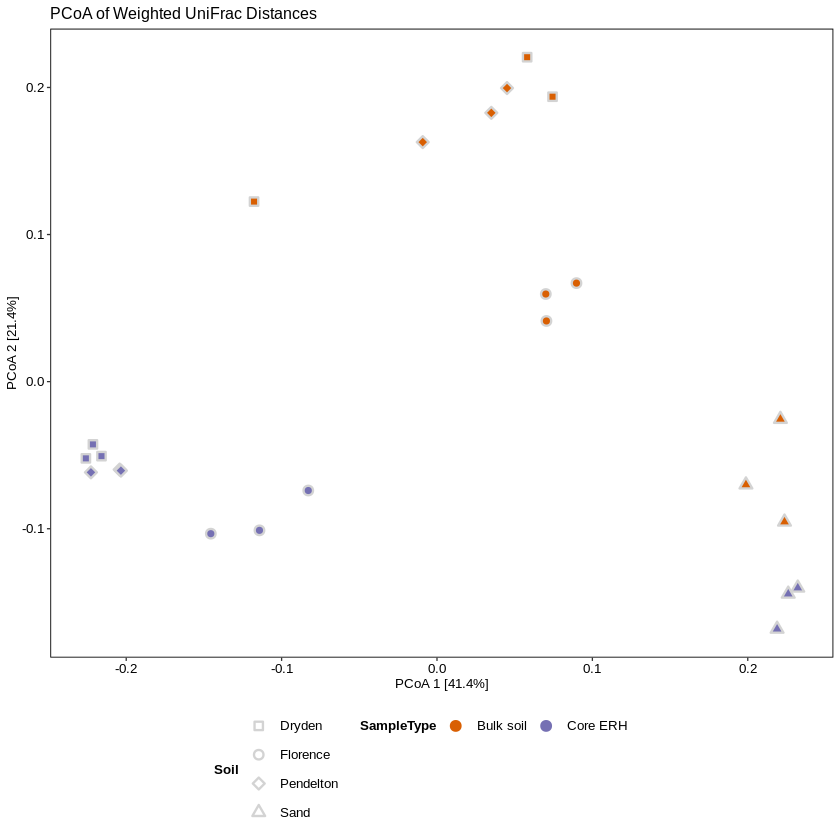

In [188]:
#setwd(figDir)
cs = brewer.pal(3,"Dark2")[2:3]
p1 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(shape = as.factor(Soil), fill = SampleType),  size = 2, stroke = 1, color = 'Light Grey') +
theme_pub() +
scale_shape_manual(values=c(22,21,23,24), guide = guide_legend(title = "Soil", ncol = 1))+
#scale_color_manual(values=c('Light Grey','Black'))+
scale_fill_manual(values = cs, labels = c("Bulk soil", "Core ERH", "Soil slurry"))+
labs(x = "PCoA 1 [41.4%]", y = "PCoA 2 [21.4%]") +
ggtitle("PCoA of Weighted UniFrac Distances")+
#facet_wrap(~Experiment, ncol = 2)

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="bottom") 

#color = "grey20",

p1

pdf(file.path(figDir,"Exp1-2_wUnif_PCOA_BSCHCS_wSand.pdf"), useDingbats = FALSE, width = 3.46, height = 3.06)
p1
dev.off()

pdf(file.path(figDir,"Exp1-2_wUnif_PCOA_BSCHCS_wSand_largeforlegend.pdf"), useDingbats = FALSE, width = 6, height = 4)
p1
dev.off()

# Evaluate community composition in sand samples
* Prune to previously identified hyphal ASVs from Experiment 1
* Subset to sand and Dryden soils as comparison
* Visualize and tabulate prevalance in hyphal samples from sand and soil 

In [13]:
deseq_dir = '~/Hyphosphere/data/3Exp/DESeq'

readfile = file.path(deseq_dir, 'dfl2fc-Exp1.txt')
df.l2fc.Exp1 = read.table(readfile, header = TRUE, sep= '\t')

readfile = file.path(deseq_dir, 'dfl2fc-Exp2.txt')
df.l2fc.Exp2 = read.table(readfile, header = TRUE, sep= '\t')

df.l2fc = bind_rows(df.l2fc.Exp1, df.l2fc.Exp2) 


df.l2fc = df.l2fc %>% separate(Subset, c("Soil","Fungus")) 

In [14]:
head(df.l2fc)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,OTU,Soil,Fungus,Term,Contrast,DAI,Kingdom,Phylum,Class,Order,Family,Genus,Experiment
331.72029,-2.716566,0.5217389,-5.206754,1.921730e-07,1.885675e-05,ASV5,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Micrococcaceae,Pseudarthrobacter,1
136.95264,4.977612,1.1905977,4.180767,2.905274e-05,1.192425e-03,ASV6,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Cellvibrio,1
0.00000,NA,NA,NA,NA,NA,ASV8,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Asticcacaulis,1
0.00000,NA,NA,NA,NA,NA,ASV13,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,1
26.70389,8.430000,1.7857267,4.720767,2.349571e-06,1.478663e-04,ASV14,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NA,1
0.00000,NA,NA,NA,NA,NA,ASV15,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,NA,1


In [18]:
HASVs = df.l2fc %>% 
    filter(padj < 0.05 & log2FoldChange > 0 & Contrast == "CH_CS" & Fungus == "Gv" & Experiment == 1) %>% 
    .$OTU %>% 
    as.character() %>%
    unique() 

In [33]:
ps.s = ps.snorm %>% 
    prune_taxa(HASVs, .) %>%
    subset_samples(Experiment == 1 & SampleType == "CH")
ps.s

ps.m = psmelt(ps.s)

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 101 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 101 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 101 tips and 100 internal nodes ]

Warning message in psmelt(ps.s):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

In [34]:
head(ps.m)

,OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,TimePoint,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus
366,ASV189,HCHS1,0.58255452,HCHS1,1,S1,Gv,Sand,CH,HN,NA,81,1,0.01,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Haliangiaceae,Haliangium
332,ASV18,HCHS2,0.17562157,HCHS2,1,S2,Gv,Sand,CH,HN,NA,81,2,0.01,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NA
780,ASV57,HCHF1,0.10930819,HCHF1,1,F1,Gv,Florence,CH,HN,NA,81,1,0.28,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,NA
1145,ASV943,HCHF2,0.06765451,HCHF2,1,F2,Gv,Florence,CH,HN,NA,81,2,0.11,Bacteria,Bacteroidetes,Bacteroidia,Cytophagales,Cytophagaceae,NA
1148,ASV943,HCHF3,0.06012679,HCHF3,1,F3,Gv,Florence,CH,HN,NA,81,3,0.07,Bacteria,Bacteroidetes,Bacteroidia,Cytophagales,Cytophagaceae,NA
969,ASV718,HCHN2,0.05420905,HCHN2,1,N2,Gv,Dryden,CH,HN,NA,81,2,0.10,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NA


In [35]:
# Organize ASVs by abundance in first sample from dryden soil

ASVLevel = ps.m %>% 
    filter(Sample == "HCHN1") %>%
    arrange(desc(Abundance)) %>%
    .$OTU %>%
    as.character()


ASVLevel
ps.m = ps.m %>% mutate(OTU = factor(OTU, levels = ASVLevel))

[1] "ASV718"   "ASV18"    "ASV661"   "ASV383"   "ASV23"    "ASV195"  
  [7] "ASV102"   "ASV509"   "ASV2435"  "ASV47"    "ASV71"    "ASV66"   
 [13] "ASV403"   "ASV5863"  "ASV566"   "ASV77"    "ASV1173"  "ASV4570" 
 [19] "ASV7267"  "ASV247"   "ASV174"   "ASV1768"  "ASV95"    "ASV61"   
 [25] "ASV846"   "ASV30"    "ASV6"     "ASV9815"  "ASV1412"  "ASV1355" 
 [31] "ASV1158"  "ASV148"   "ASV3437"  "ASV3731"  "ASV14"    "ASV10718"
 [37] "ASV8323"  "ASV1480"  "ASV4494"  "ASV754"   "ASV1636"  "ASV708"  
 [43] "ASV10760" "ASV378"   "ASV675"   "ASV14982" "ASV1043"  "ASV1132" 
 [49] "ASV11470" "ASV118"   "ASV12274" "ASV13032" "ASV1386"  "ASV143"  
 [55] "ASV146"   "ASV14873" "ASV15608" "ASV1674"  "ASV17"    "ASV1847" 
 [61] "ASV1862"  "ASV189"   "ASV2181"  "ASV2473"  "ASV2725"  "ASV2825" 
 [67] "ASV3052"  "ASV335"   "ASV341"   "ASV342"   "ASV3962"  "ASV4012" 
 [73] "ASV4569"  "ASV4735"  "ASV5033"  "ASV508"   "ASV5104"  "ASV518"  
 [79] "ASV528"   "ASV5354"  "ASV57"    "ASV5832"  "ASV6087"  "ASV615"  
 [85] "ASV616"   "ASV6450"  "ASV692"   "ASV7162"  "ASV7758"  "ASV7875" 
 [91] "ASV8292"  "ASV8351"  "ASV8460"  "ASV8549"  "ASV8926"  "ASV915"  
 [97] "ASV928"   "ASV943"   "ASV9437"  "ASV9567"  "ASV987"

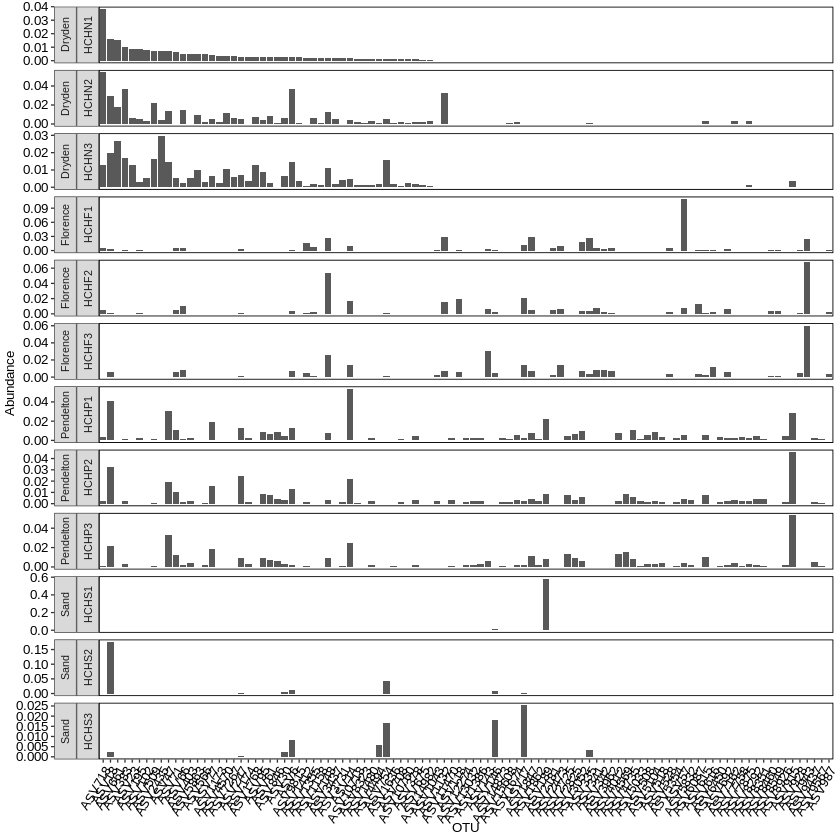

In [48]:
ps.m %>%
    ggplot(aes(x = OTU, y = Abundance)) +
    geom_bar(stat = "identity")+
    facet_grid(Soil*Sample~., switch = 'y', scales = 'free_y')+
    theme_pub()+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))


In [65]:
rep(c(1,1:10*10), each = 10)

[1]   1   1   1   1   1   1   1   1   1   1  10  10  10  10  10  10  10  10
 [19]  10  10  20  20  20  20  20  20  20  20  20  20  30  30  30  30  30  30
 [37]  30  30  30  30  40  40  40  40  40  40  40  40  40  40  50  50  50  50
 [55]  50  50  50  50  50  50  60  60  60  60  60  60  60  60  60  60  70  70
 [73]  70  70  70  70  70  70  70  70  80  80  80  80  80  80  80  80  80  80
 [91]  90  90  90  90  90  90  90  90  90  90 100 100 100 100 100 100 100 100
[109] 100 100

# Create similar graph but use most abundant taxa rather than HASVs

* get top Taxa from hyphal samples in live soil

In [54]:
topTax = ps.snorm %>%
    subset_samples(Experiment == 1 & SampleType == "CH" & Soil != "Sand") %>%
    taxa_sums() %>%
   sort(decreasing = TRUE)%>%
    .[1:100] %>%
    names %>%
    as.character()

In [56]:
ps.s = ps.snorm %>% 
    prune_taxa(topTax, .) %>%
    subset_samples(Experiment == 1 & SampleType == "CH")
ps.s

ps.m = psmelt(ps.s)

ps.m = ps.m %>% mutate(OTU = factor(OTU, levels = topTax))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 100 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 100 tips and 99 internal nodes ]

Warning message in psmelt(ps.s):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”

In [74]:
Ccs = c('#1B9E77', #Actinobacteria
        '#6E8243', #Alphaproteo
        '#C16610',#Anaerolineae
        '#8D6B86',#Bacteroidia
         '#B96439',    #Chloroflexa
        '#BC4399', #Deltaproteo
        '#DE3083',#Fibrobacteria
        '#A66753', #Gammaproteo
        '#6E9E24', #Gemmatimonadetes
        '#96A713',#Kd4-96
         '#8A62AB',           #Mollicutes
        '#CEAA07',#NC10
        '#D59D08', #Nitrospira
         '#B98614',  #Planctomycetacia
        '#666666',   #Subgroup_17
        '#9D7426',#Subgroup_6
        '#826D46', #Thermoleoph
        '#888888') #NA

 # '#B96439',#Bacilli
#'#8A62AB',#Blastocatellia (subgroup_4)
#'#B98614',#Oxyphotobater
        #'#666666')#Verrucom

Pcs = c('#1B9E77', #Acidobacteria
'#897932', #Actinobacteria
'#C8611F' , #Bacteroides
'#8D6B86', #Chloroflexi
'#CF3F76', #Fibrobacteres
'#A66753', #Fimicutes
'#70A61B', #Gemmatimonadetes
'#BBA90B', #Nitrospirae
'#D59D08', #Planctomycetes
'#B07E18', #Proteobacteria
'#8B6F3B', #Rokubacteria
'#666666') #Tenericutes

#getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
#getPalette(13)

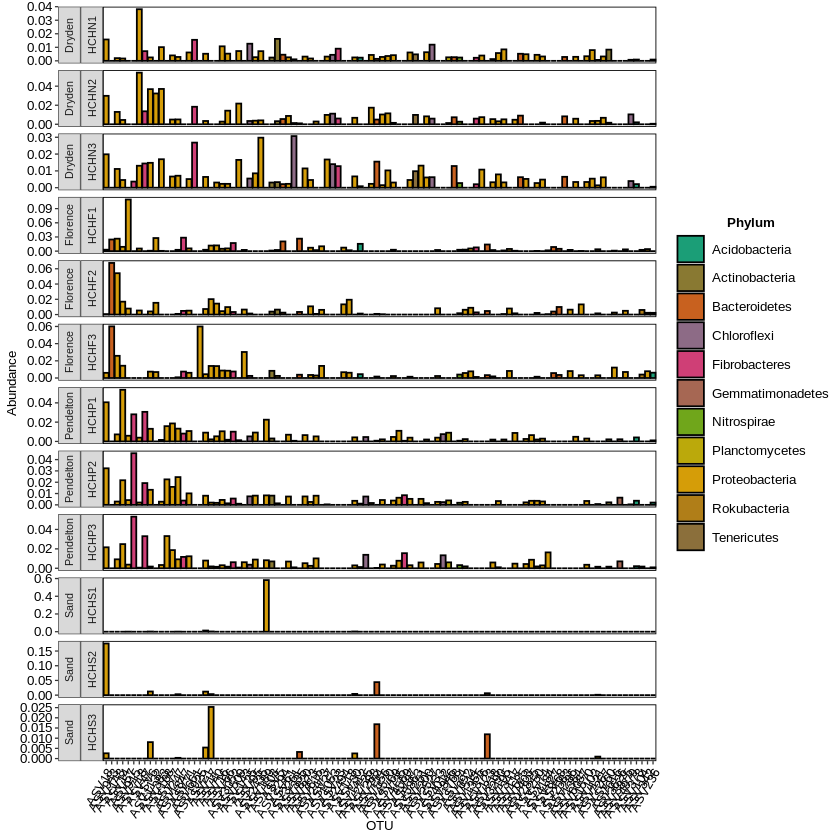

In [79]:
p2 = ps.m %>%
    ggplot(aes(x = OTU, y = Abundance, fill = Phylum)) +
    geom_bar(stat = "identity", color = "black")+
    facet_grid(Soil*Sample~., switch = 'y', scales = 'free_y')+
    theme_pub()+
    theme(axis.text.x = element_text(angle = 60, hjust = 1))+
    scale_fill_manual(values = Pcs)
p2

In [81]:
figDir

[1] "~/Hyphosphere/data/3Exp/figures/final"

In [80]:
pdf(file.path(figDir,"Exp1-topTaxa-wSand.pdf"), useDingbats = FALSE, width = 6.5, height = 6)
p2
dev.off()

png 
  2

# Try ordination with root compartment samples also included to evaluate how the sand mesocosms compare

In [176]:
ps.s = ps.snorm %>% subset_samples(Experiment %in% c(1, 2) & 
                                   SampleType %in% c("CS", "CH", "BS", "BH", "BP", "RH", "RS") & Fungus == "Gv")

In [177]:
ps.s %>% sample_data() %>% .$SampleType %>% unique()

[1] "BH" "BP" "BS" "CH" "CS" "RH" "RS"

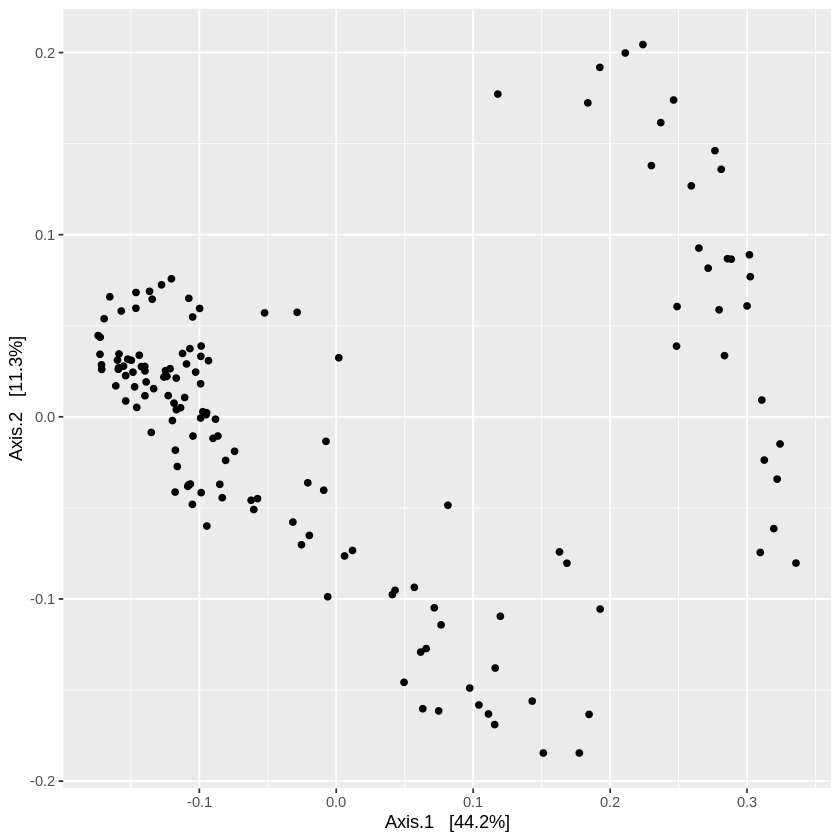

In [178]:
ordu = ordinate(ps.s, "PCoA", "unifrac", weighted=TRUE)
p = plot_ordination(ps.s, ordu, justDF = TRUE)
plot_ordination(ps.s, ordu)

In [169]:
brewer.pal(7,"Dark2")

cs = c('#66a61e', #BH
        '#e7298a', #BP
       '#1b9e77', #BS
        '#d95f02', #CH, 
        '#7570b3', #CS,
        "#e6ab02", #RH
        "#a6761d") #RS

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"

In [95]:
# brewer.pal(7,"Dark2")

# cs = c(
#        '#1b9e77', #BS
#         '#d95f02',#CH, 
#        '#7570b3', #CS,
#        "#e6ab02", #RH
#        "#a6761d", #RS
#        '#66a61e') #BH) 

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"

png 
  2

png 
  2

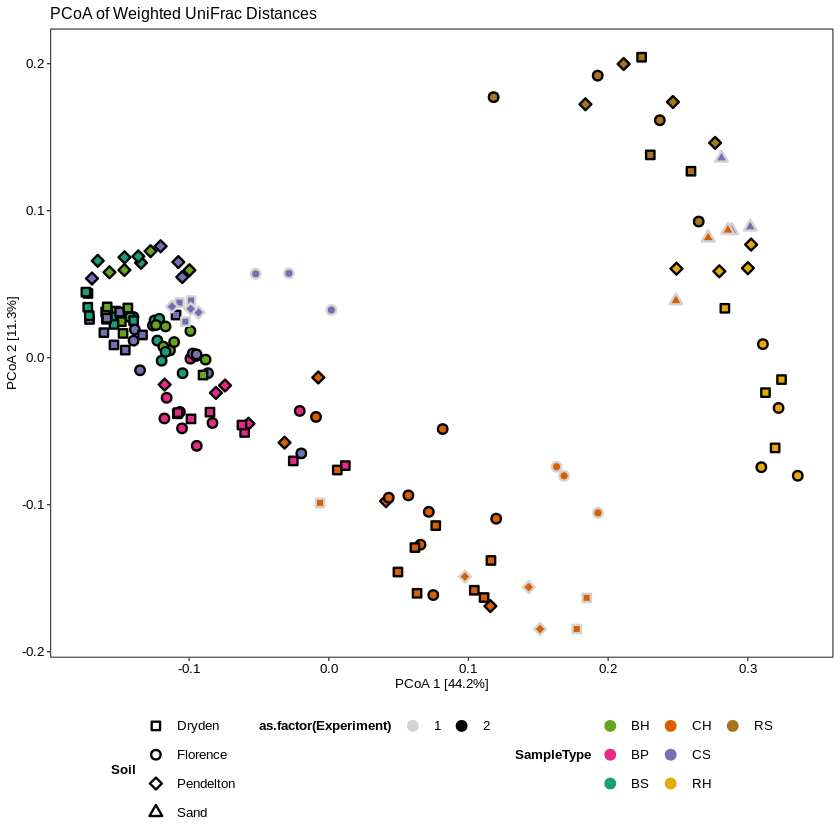

In [181]:
#setwd(figDir)

p1 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(shape = as.factor(Soil), fill = SampleType, color = as.factor(Experiment)),  size = 2, stroke = 1) +
theme_pub() +
scale_shape_manual(values=c(22,21,23,24), guide = guide_legend(title = "Soil", ncol = 1))+
scale_color_manual(values=c('Light Grey','Black'))+
scale_fill_manual(values = cs) + # labels = c("Bulk soil", "Core ERH", "Soil slurry"))+
labs(x = "PCoA 1 [44.2%]", y = "PCoA 2 [11.3%]") +
ggtitle("PCoA of Weighted UniFrac Distances")+
#facet_wrap(~Experiment, ncol = 2)

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="bottom") 

#color = "grey20",

p1

pdf(file.path(figDir,"Exp1-2_wUnif_PCOA_BSCHCS_rev1.pdf"), useDingbats = FALSE, width = 3.46, height = 3.06)
p1
dev.off()

pdf(file.path(figDir,"Exp1-2_wUnif_PCOA_BSCHCS_largeforlegend_rev1.pdf"), useDingbats = FALSE, width = 6, height = 4)
p1
dev.off()

# Try ordination with with bray-curtis distances to see if variation on individual ASVs are apparent in ordination

In [167]:
ps.s = ps.snorm %>% subset_samples(Experiment %in% c(1, 2) & 
                                   SampleType %in% c("CS", "CH", "BS", "RH", "RS", "RT") & Fungus == "Gv")

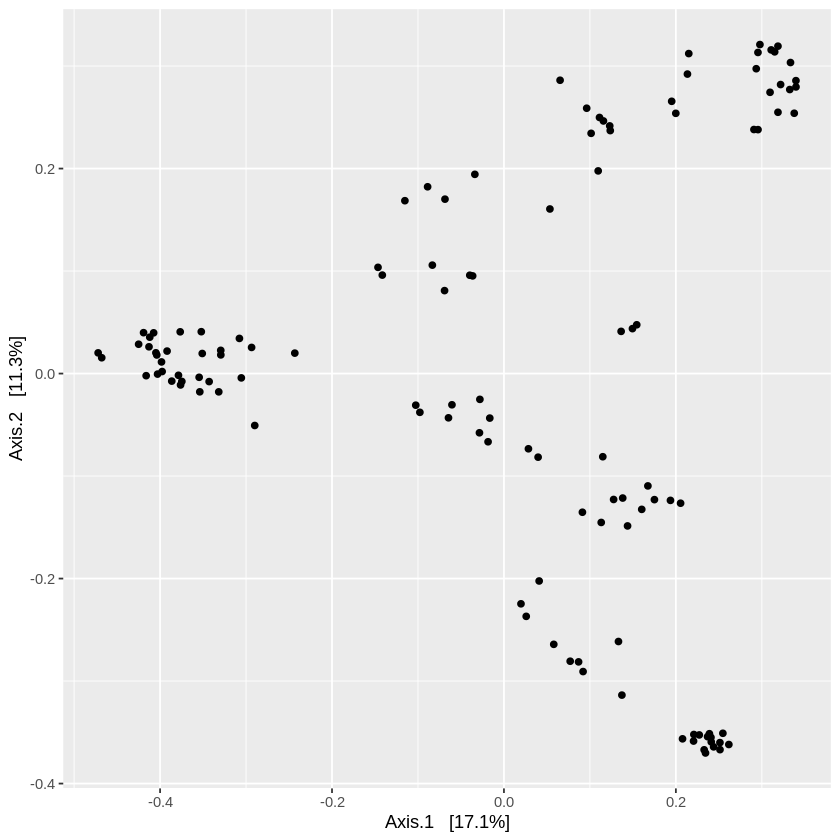

In [159]:
ordu = ordinate(ps.s, "PCoA", "bray", weighted=TRUE)
p = plot_ordination(ps.s, ordu, justDF = TRUE)
plot_ordination(ps.s, ordu)

In [160]:
brewer.pal(7,"Dark2")

cs = c(
       '#1b9e77', #BS
        '#d95f02',#CH, 
       '#7570b3', #CS,
       "#e6ab02", #RH
       "#a6761d", #RS
       '#66a61e') #BH) 

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"

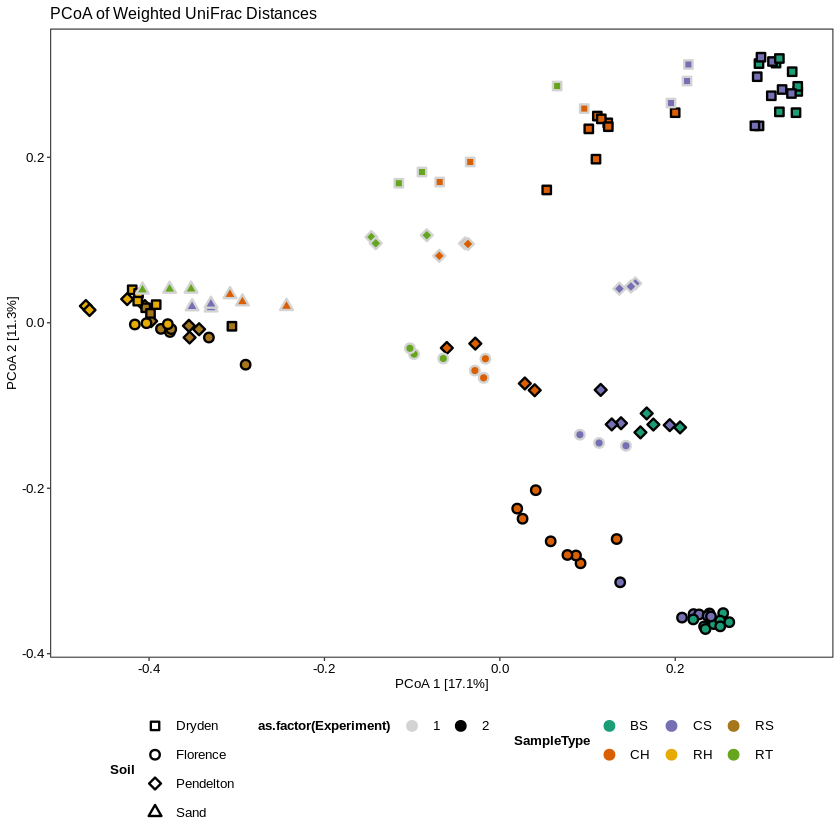

In [161]:
p1 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
geom_point(aes(shape = as.factor(Soil), fill = SampleType, color = as.factor(Experiment)),  size = 2, stroke = 1) +
theme_pub() +
scale_shape_manual(values=c(22,21,23,24), guide = guide_legend(title = "Soil", ncol = 1))+
scale_color_manual(values=c('Light Grey','Black'))+
scale_fill_manual(values = cs) + # labels = c("Bulk soil", "Core ERH", "Soil slurry"))+
labs(x = "PCoA 1 [17.1%]", y = "PCoA 2 [11.3%]") +
ggtitle("PCoA of Bray-Curtis Distances")+
#facet_wrap(~Experiment, ncol = 2)

guides(fill=guide_legend(override.aes=list(colour= cs), ncol = 3)) + 
theme(legend.position="bottom") 

#color = "grey20",

p1

# Check root hyphae comparison

In [200]:
topTax = ps.snorm %>%
    subset_samples(Experiment == 2 & SampleType == "RH") %>%
    taxa_sums() %>%
   sort(decreasing = TRUE)%>%
    .[1:50] %>%
    names %>%
    as.character()

HASVs = df.l2fc %>% 
    filter(padj < 0.05 & log2FoldChange > 0 & Contrast == "CH_CS" & Fungus == "Gv" & 
         Experiment == "2") %>% 
    .$OTU %>% 
    as.character() %>%
    unique()

In [237]:
ps.s = ps.snorm %>% 
    prune_taxa(HASVs, .) %>%
    subset_samples(Experiment == 2 & SampleType %in% c("CH","RH") & Soil == 'Dryden' & Fungus == "Gv" & Treatment == "HN"
                   | Experiment == 1 & SampleType == "CH"
                  & Soil == "Sand")
ps.s

ps.m = psmelt(ps.s)

ASVLevel = ps.m %>% 
    filter(SampleType == "CH" & Soil == "Dryden") %>%
    group_by(OTU) %>%
    summarise(sumAbundance = sum(Abundance)) %>%
    arrange(desc(sumAbundance)) %>%
    .$OTU %>%
    as.character()%>%
    .[1:75]

ASVLevel

ps.m = ps.m %>% 
    filter(OTU %in% ASVLevel) %>%
           mutate(OTU = factor(OTU, levels = ASVLevel))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 75 taxa and 11 samples ]
sample_data() Sample Data:       [ 11 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 75 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 75 tips and 74 internal nodes ]

Warning message in psmelt(ps.s):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”`summarise()` ungrouping output (override with `.groups` argument)


[1] "ASV57"   "ASV61"   "ASV23"   "ASV283"  "ASV18"   "ASV14"   "ASV16"  
 [8] "ASV6"    "ASV1808" "ASV672"  "ASV27"   "ASV190"  "ASV17"   "ASV45"  
[15] "ASV541"  "ASV1772" "ASV2577" "ASV382"  "ASV895"  "ASV21"   "ASV77"  
[22] "ASV462"  "ASV125"  "ASV66"   "ASV509"  "ASV616"  "ASV1597" "ASV1629"
[29] "ASV2347" "ASV1199" "ASV645"  "ASV412"  "ASV1550" "ASV440"  "ASV117" 
[36] "ASV251"  "ASV300"  "ASV280"  "ASV1719" "ASV8"    "ASV708"  "ASV487" 
[43] "ASV1742" "ASV991"  "ASV416"  "ASV884"  "ASV657"  "ASV846"  "ASV910" 
[50] "ASV1370" "ASV789"  "ASV1146" "ASV1389" "ASV287"  "ASV1523" "ASV386" 
[57] "ASV47"   "ASV1885" "ASV894"  "ASV1182" "ASV1700" "ASV2641" "ASV1263"
[64] "ASV1067" "ASV1596" "ASV978"  "ASV2472" "ASV1017" "ASV1032" "ASV1666"
[71] "ASV1692" "ASV2063" "ASV53"   "ASV638"  "ASV903"

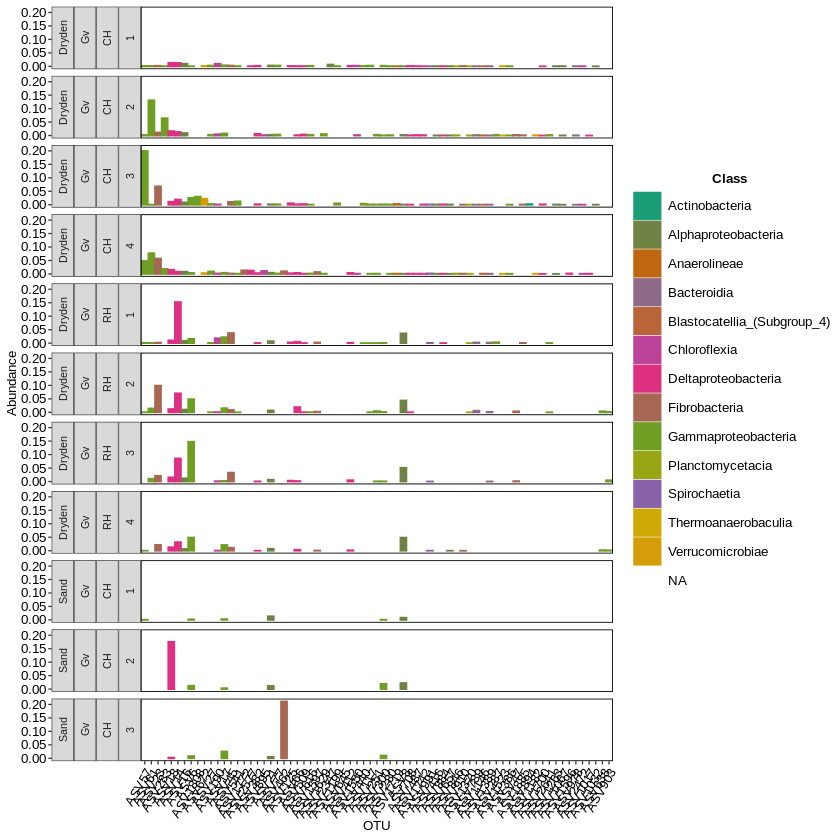

In [242]:
p2 = ps.m %>%
    filter(Abundance > 0) %>%
    ggplot(aes(x = OTU, y = Abundance, fill = Class, color = Class, label = Family)) +
    geom_bar(stat = "identity")+
    facet_grid(Soil*Fungus*SampleType*Rep~., switch = 'y')+
    theme_pub()+
    theme(axis.text.x = element_text(angle = 60, hjust = 1),
         legend.position = 'right')+
    scale_fill_manual(values = Ccs)+
    scale_color_manual(values = Ccs)
p2

In [247]:
ps.m %>% filter(Sample == "GVN7HN2-CH" & OTU == "ASV672")

OTU,Sample,Abundance,sample_Sample,Experiment,Plant,Fungus,Soil,SampleType,Treatment,TimePoint,DAI,Rep,Concentration_ng.ul,Kingdom,Phylum,Class,Order,Family,Genus
ASV672,GVN7HN2-CH,0,GVN7HN2-CH,2,GVN7HN2,Gv,Dryden,CH,HN,NA,27,2,NA,Bacteria,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Chthoniobacter
